In [1]:
import pandas as pd

# Crear una lista para almacenar los DataFrames
dataframes = []

# Leer los archivos CSV y almacenarlos en la lista
for i in range(1, 31):
    file_name = f'data/DATOSCLIENTE{i}.csv'
    df = pd.read_csv(file_name)
    df['NumeroCliente'] = str("Cliente "+str(i))
    dataframes.append(df)

# Ahora dataframes[0] contendrá los datos de DATOSCLIENTE1.csv, dataframes[1] contendrá DATOSCLIENTE2.csv y así sucesivamente.
# Puedes acceder a los datos de cada cliente por separado, por ejemplo:
# print(dataframes[0])  # Imprimir los datos del primer cliente


In [2]:
combined_df = pd.concat(dataframes)
combined_df

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,NumeroCliente
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1
...,...,...,...,...,...,...
11410,2022-04-21 10:00:00,0.960105,0.473234,1273.150602,1027.084539,Cliente 30
11411,2022-04-21 11:00:00,0.624300,0.699936,1063.524968,1205.829819,Cliente 30
11412,2022-04-21 12:00:00,0.985633,0.123560,1207.284283,1127.893714,Cliente 30
11413,2022-04-21 13:00:00,0.710436,0.399262,1205.012971,1090.835898,Cliente 30


In [3]:
# Reemplaza 'nombre_del_archivo.xlsx' con la ruta y el nombre de tu archivo Excel
archivo_excel = 'data/sector_economico_clientes.xlsx'

# Leer el archivo Excel y guardarlo en una variable
dataframe = pd.read_excel(archivo_excel)
# Cambia el nombre de la columna "Cliente:" a "NumeroCliente"
dataframe = dataframe.rename(columns={'Cliente:': 'NumeroCliente'})
dataframe['NumeroCliente'] = dataframe['NumeroCliente'].str.strip()

dataframe.head()

,NumeroCliente,Sector Económico:
0,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,Cliente 2,Elaboración de cacao y chocolate y de producto...
2,Cliente 3,Elaboración de cacao y chocolate y de producto...
3,Cliente 4,Elaboración de cacao y chocolate y de producto...
4,Cliente 5,Elaboración de cacao y chocolate y de producto...


In [4]:
# Realizar la unión (join) basado en la columna "NumeroCliente"
combined_df = combined_df.merge(dataframe[['NumeroCliente', 'Sector Económico:']], on='NumeroCliente', how='left')


In [5]:
df = combined_df.copy()
df.head(5)

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,NumeroCliente,Sector Económico:
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1,Elaboración de cacao y chocolate y de producto...
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1,Elaboración de cacao y chocolate y de producto...
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1,Elaboración de cacao y chocolate y de producto...
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1,Elaboración de cacao y chocolate y de producto...


#### 1. Preparación de los Datos
La preparación adecuada de los datos es fundamental antes de aplicar cualquier modelo de machine learning, y en particular para la detección de anomalías, por varias razones:
1. Conversión de Fechas
•	Indexación Temporal: Las series de tiempo requieren que las fechas sean interpretadas correctamente como índices temporales para realizar análisis en función del tiempo. Esto permite operaciones como agrupación por periodos (horas, días, meses), cálculos de tendencias o estacionalidades, y alineación con otras series de tiempo.
•	Funcionalidad: Muchas bibliotecas de análisis de datos y machine learning (como pandas y scikit-learn) requieren que las columnas de fecha estén en formatos específicos (como objetos datetime de Python) para manejarlas adecuadamente, facilitando así el filtrado, la visualización y el modelado.
2. Normalización de Características Numéricas
•	Escalado Uniforme: Algoritmos como PCA y muchos métodos de clustering, incluidos DBSCAN y técnicas basadas en vecinos más cercanos como LOF, asumen que todas las características numéricas contribuyen equitativamente. Sin normalización, una característica con valores numéricos grandes dominaría las otras características, sesgando los resultados del modelo.
•	Mejora del Rendimiento: La normalización ayuda a mejorar la convergencia de muchos algoritmos de machine learning, reduciendo la posibilidad de que el modelo sea inestable o converja a un mínimo local no óptimo.
•	Comparabilidad: Permite comparar diferentes variables en un mismo plano de análisis. Por ejemplo, si comparas el consumo de energía activa (medido en kWh) con el voltaje (en voltios), la normalización escala estos valores a un rango común, haciendo sus variaciones comparables en términos relativos.
3. Generalización de los Modelos
•	Reducción de Sesgos: La normalización asegura que el modelo no se vea injustamente sesgado hacia características con rangos de valores más amplios.
•	Adaptabilidad: Un modelo entrenado sobre datos normalizados generalmente es más adaptable y robusto, lo que es crucial cuando los datos futuros pueden tener características numéricas que varíen en magnitudes diferentes a las del conjunto de datos de entrenamiento.

Por tanto, tiene sentido normalizar los datos incluso en el sector de detección de anomalías en clientes de energía eléctrica, especialmente cuando se utilizan técnicas de aprendizaje automático que son sensibles a la escala de los datos. La normalización ayuda a asegurar que cada característica contribuya equitativamente al análisis, sin que una sobresalga injustamente debido a su escala.

#### Entender el Origen de los Valores Negativos
En el contexto de la detección de anomalías, no siempre es necesario eliminar los valores negativos directamente, ya que estos pueden ser indicativos de comportamientos anómalos o errores en los datos que son precisamente lo que el modelo busca identificar. 
Errores de Medición o de Datos: Si los valores negativos son el resultado de errores de medición o de entrada de datos, corregir estos errores o eliminar las entradas incorrectas puede ser necesario para mantener la integridad del análisis.
Comportamientos Anómalos Reales: Si los valores negativos reflejan un comportamiento anómalo legítimo, como el robo de energía (donde el medidor podría mostrar consumos negativos debido a manipulaciones), entonces estos datos son valiosos para el modelo y deben ser conservados.

#### Datos Normalizados
Aunque la normalización es útil para el análisis y la modelación, para la visualización en un dashboard, especialmente en un contexto empresarial donde los datos crudos tienen un significado concreto (como kWh en el consumo de energía), es importante mostrar los datos en su forma original o en una forma que sea intuitiva para los usuarios finales:

1.	Almacenar Ambas Versiones de los Datos: Al preparar los datos para el análisis, se puede considera almacenar tanto los valores originales como los normalizados. De esta manera, se puede utilizar los datos normalizados para la detección de anomalías y los datos originales para la visualización.
2.	Visualización de Anomalías con Datos Originales: Configurar  visualizaciones para utilizar los valores originales para mostrar métricas como el consumo de energía, mientras que las etiquetas o colores en el gráfico reflejan el resultado del análisis de anomalías.

In [6]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

# Normalizar los datos numéricos
scaler = StandardScaler()
df[['Active_energy_N', 'Reactive_energy_N', 'Voltaje_FA_N', 'Voltaje_FC_N']] = scaler.fit_transform(df[['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']])

#### Conversión de Fechas
Indexación Temporal: Las series de tiempo requieren que las fechas sean interpretadas correctamente como índices temporales para realizar análisis en función del tiempo. Esto permite operaciones como agrupación por periodos (horas, días, meses), cálculos de tendencias o estacionalidades, y alineación con otras series de tiempo.

#### Agregar columnas adicionales 
Agregar columnas adicionales como el año, mes, día de la semana y hora es útil tanto para la elaboración de modelos de machine learning como para la visualización, especialmente en un contexto de análisis de series temporales como el de la detección de anomalías en el consumo de energía eléctrica. 
1. Mejora de Modelos de Machine Learning
Patrones Estacionales y Tendencias: Muchos comportamientos de consumo están fuertemente influenciados por patrones estacionales o diarios. Por ejemplo, el consumo energético puede variar significativamente entre días laborables y fines de semana, o entre diferentes meses del año debido a condiciones climáticas. Identificar estas tendencias puede mejorar significativamente la precisión de los modelos.
Feature Engineering: Al desglosar la fecha y hora en componentes más granulares (como hora del día o día de la semana), se puede capturar efectivamente estas variabilidades en los modelos. Esto puede ayudar a ajustar las predicciones del modelo para reflejar patrones de uso típicos o atípicos.
Detección de Anomalías Contextual: En la detección de anomalías, entender el contexto temporal puede ser crucial. Un patrón de consumo que es normal durante el día puede ser anómalo durante la noche, y viceversa.
2. Visualización de Datos
Interpretación Mejorada: Las visualizaciones que incluyen desgloses por año, mes, día de la semana o hora pueden ayudar a los usuarios a interpretar mejor los datos. Por ejemplo, podrían identificar rápidamente si las anomalías tienden a ocurrir en ciertos momentos específicos.
Interacción del Usuario: En herramientas como Power BI, permitir a los usuarios filtrar o desglosar datos basados en estos atributos temporales puede mejorar significativamente la experiencia del usuario, permitiéndoles explorar los datos de manera más intuitiva y significativa.

In [7]:
# Convertir la columna 'Fecha' a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Columnas adicionales
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df['Hora'] = df['Fecha'].dt.hour
df['Día_semana'] = df['Fecha'].dt.dayofweek  # 0 es lunes, 6 es domingo

# Calcular la semana del mes
# Se calcula dividiendo el día del mes por 7 y redondeando hacia arriba
df['Semana_del_mes'] = ((df['Fecha'].dt.day - 1) // 7 + 1)

# Establecer la fecha como índice
df.set_index('Fecha', inplace=True)

df.sample(10)

,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,NumeroCliente,Sector Económico:,Active_energy_N,Reactive_energy_N,Voltaje_FA_N,Voltaje_FC_N,Año,Mes,Día,Hora,Día_semana,Semana_del_mes
Fecha,,,,,,,,,,,,,,,,
2021-08-29 02:00:00,2.197024,0.739179,715.486475,714.391496,Cliente 3,Elaboración de cacao y chocolate y de producto...,0.421796,-0.115552,-0.919618,-0.970095,2021,8,29,2,6,5
2021-12-24 23:00:00,5.469218,3.300747,2047.280384,1994.349646,Cliente 17,"Captación, tratamiento y distribución de agua",2.325587,2.094899,0.818339,0.744640,2021,12,24,23,4,4
2021-06-27 19:00:00,0.034958,0.047732,1464.066445,1648.222215,Cliente 21,Cultivo de Hortalizas,-0.836113,-0.712222,0.057260,0.280940,2021,6,27,19,6,4
2021-05-18 07:00:00,0.587558,0.290921,1094.684723,982.255532,Cliente 6,Cultivo de Árboles Frutales y Nueces,-0.514605,-0.502367,-0.424774,-0.611243,2021,5,18,7,1,3
2021-09-22 14:00:00,3.076319,3.243556,1184.184005,1103.723653,Cliente 12,Cultivo de otros frutos y nueces de árboles y ...,0.933378,2.045547,-0.307980,-0.448515,2021,9,22,14,2,4
2021-01-20 21:00:00,0.231000,0.200799,1249.913023,997.361871,Cliente 9,Cultivo de Árboles Frutales y Nueces,-0.722054,-0.580136,-0.222205,-0.591005,2021,1,20,21,2,3
2021-10-13 04:00:00,2.856814,1.851230,735.992672,753.965873,Cliente 2,Elaboración de cacao y chocolate y de producto...,0.805668,0.844069,-0.892858,-0.917078,2021,10,13,4,2,2
2021-02-17 09:00:00,0.300095,0.342840,2287.576457,2383.163557,Cliente 23,Cultivo de Hortalizas,-0.681854,-0.457564,1.131920,1.265526,2021,2,17,9,2,3
2021-01-10 06:00:00,0.076133,0.084363,1894.464929,1726.912113,Cliente 24,Cultivo de Hortalizas,-0.812156,-0.680612,0.618919,0.386359,2021,1,10,6,6,2


#### Entender el Origen de los Valores Negativos
En el contexto de la detección de anomalías, no siempre es necesario eliminar los valores negativos directamente, ya que estos pueden ser indicativos de comportamientos anómalos o errores en los datos que son precisamente lo que el modelo busca identificar. 
Errores de Medición o de Datos: Si los valores negativos son el resultado de errores de medición o de entrada de datos, corregir estos errores o eliminar las entradas incorrectas puede ser necesario para mantener la integridad del análisis.
Comportamientos Anómalos Reales: Si los valores negativos reflejan un comportamiento anómalo legítimo, como el robo de energía (donde el medidor podría mostrar consumos negativos debido a manipulaciones), entonces estos datos son valiosos para el modelo y deben ser conservados.

#### 2. Aplicación de Modelos
Ahora que los datos están preparados, se aplica PCA para reducción de dimensiones y luego LOF y DBSCAN para la detección de anomalías.

Realizar un Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos es una excelente opción, especialmente cuando se trabaja con aprendizaje no supervisado y no se tienen etiquetas de salida. PCA puede ayudar a visualizar los datos de alta dimensionalidad en un espacio de dimensiones reducidas y a identificar patrones o estructuras subyacentes que podrían no ser evidentes en el espacio de alta dimensión.

Selección de Características: Antes de aplicar PCA, es importante seleccionar las características numéricas adecuadas. Las características temporales como año, mes, día, etc., suelen ser categóricas y podrían necesitar ser transformadas adecuadamente o excluidas del PCA si no se codifican de una manera que tenga sentido para el análisis.

Aplicación de PCA: biblioteca scikit-learn para aplicar PCA.

Interpretación de Resultados: Analizar los componentes principales (PCs) para entender qué variaciones capturan en los datos. Esto puede dar insights sobre las principales fuentes de variabilidad y, potencialmente, sobre cualquier patrón anómalo.

Dado el amplio rango de fechas, se considera segmentar el análisis para capturar cambios o tendencias a lo largo del tiempo:
- Análisis Anual: PCA por cada año para ver cómo evolucionan los patrones en el tiempo. Esto puede ayudar a identificar cambios estructurales o tendencias emergentes en los datos.
- PCA Global: Realizar un PCA en todo el conjunto de datos para obtener una vista general de las principales fuentes de variabilidad a lo largo de todo el período.


 #### PCA 
 Primero considerando una segmentación anual, que es una buena práctica para un rango temporal tan extenso

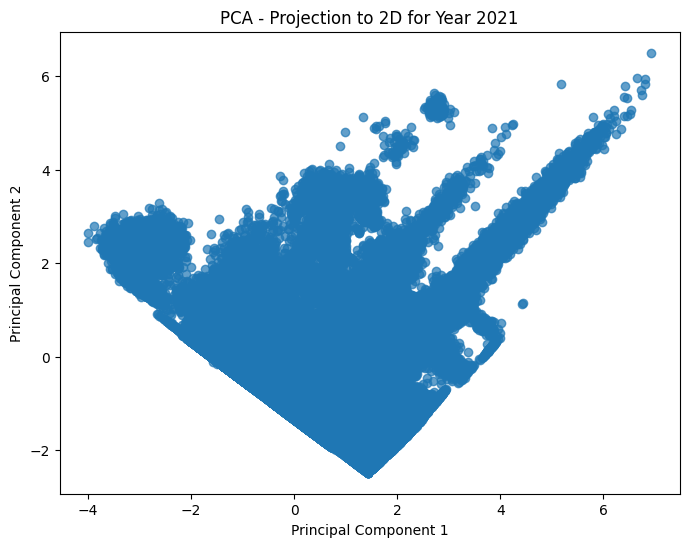

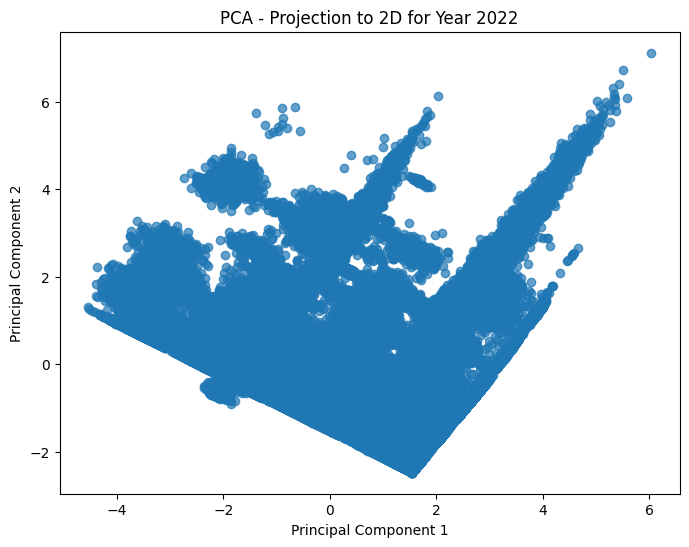

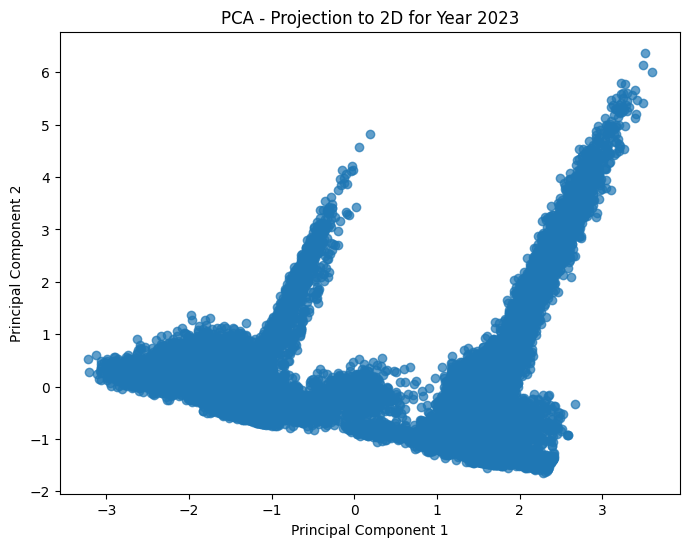

In [43]:
# PCA Anual
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

years = df['Año'].unique()  # Obtener los años únicos en el DataFrame

for year in years:
    # Filtrar datos por año
    df_year = df[df['Año'] == year]
    features = ['Active_energy_N', 'Reactive_energy_N', 'Voltaje_FA_N', 'Voltaje_FC_N']
    X = df_year[features]

    # Aplicar PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Visualizar los primeros dos componentes principales
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA - Projection to 2D for Year {year}')
    plt.show()


Las gráficas de PCA para los años completos 2021 y 2022 son muy similares, esto puede indicar varios aspectos interesantes sobre tus datos y el consumo de energía entre esos períodos:

Consistencia en los Patrones de Consumo: La similitud en las gráficas de PCA sugiere que los patrones de consumo de energía, al menos en términos de las variables que estás analizando (energía activa, energía reactiva, y voltajes), han sido bastante consistentes a lo largo de esos años. Esto puede deberse a:

* Estabilidad Operativa: No ha habido cambios significativos en las operaciones o en los perfiles de consumo de los clientes.
* Ausencia de Eventos Disruptivos: No ha ocurrido ningún evento significativo (como cambios en la regulación, grandes avances tecnológicos en la eficiencia energética, o cambios económicos drásticos) que pudiera haber alterado los patrones de consumo de energía.

Realizar un PCA global para aplicar el gráfico del codo y evaluar la varianza explicada como estrategia, para obtener una visión general de la estructura de los datos a lo largo de todo el período disponible. Este enfoque  ayudará a identificar el número óptimo de componentes principales necesarios para capturar la mayor parte de la información relevante en el conjunto completo de datos, sin estar limitado a un análisis anual.

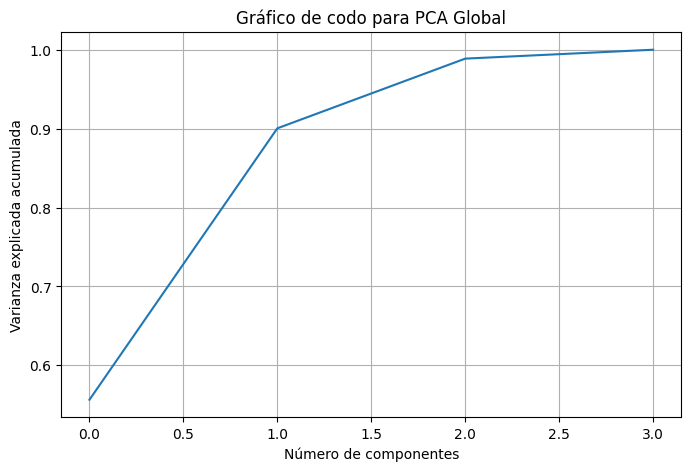

Número de componentes necesarios para explicar al menos el 90% de la varianza: 2


In [45]:
# PCA Global
import numpy as np

# Seleccionamos solo las columnas numéricas relevantes para PCA
features = ['Active_energy_N', 'Reactive_energy_N', 'Voltaje_FA_N', 'Voltaje_FC_N']
X = df[features]

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Gráfico de codo para PCA Global')
plt.grid(True)
plt.show()

# Determinar el número de componentes para un umbral de varianza explicada (ej., 90%)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.where(cumulative_variance >= 0.90)[0][0] + 1
print(f"Número de componentes necesarios para explicar al menos el 90% de la varianza: {n_components_90}")

* Gráfico de Codo: Visualizamos cómo la varianza explicada acumulada se incrementa con cada componente adicional para ayudar a identificar un punto donde los beneficios de añadir más componentes disminuyen, lo que indica el número óptimo de componentes a retener.
* Evaluación de Varianza Explicada: Usamos un umbral, como el 90%, para determinar cuántos componentes son necesarios para capturar la mayoría de la varianza en los datos, lo cual es útil para decisiones sobre la dimensionalidad en aplicaciones subsiguientes.

2 componentes principales son suficientes para explicar al menos el 90% de la varianza en los datos, esto indica que estas dos dimensiones capturan la gran mayoría de la información relevante en tus características de energía y voltaje.

Interpretación de los Componentes Principales
Dado que dos componentes explican la mayor parte de la varianza:

Componente Principal 1 (PC1): Este componente probablemente captura la mayor variabilidad en tus datos. Sería útil examinar los vectores de este componente para entender qué variables tienen más peso, lo que puede indicar qué característica(s) son las más influyentes.
Componente Principal 2 (PC2): Este componente añade información adicional que no está capturada por el primer componente. Su interpretación también puede proporcionar insights sobre las dinámicas de los datos que son ortogonales (independientes) al primer componente.

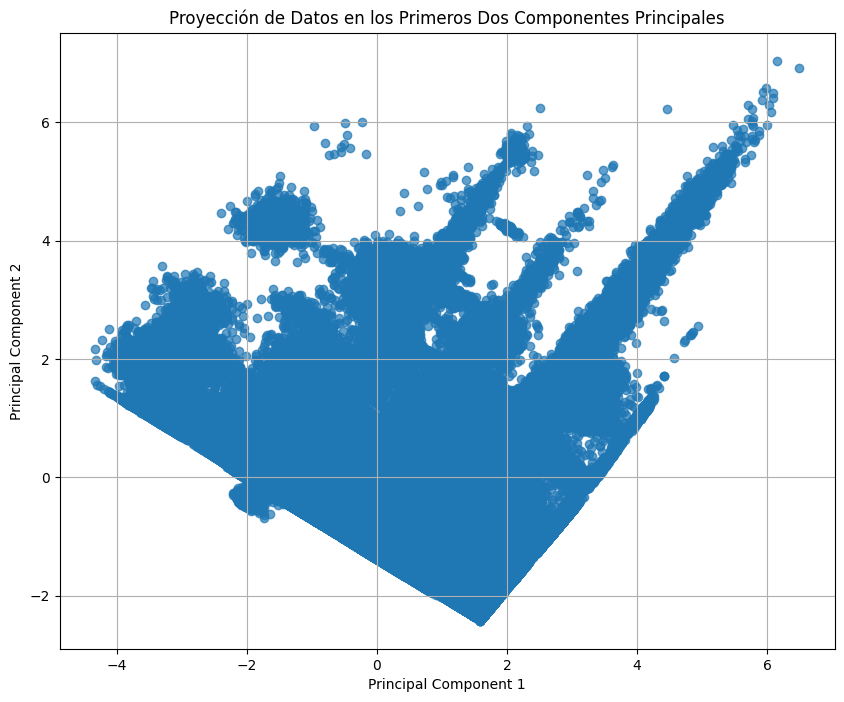

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Proyección de Datos en los Primeros Dos Componentes Principales')
plt.grid(True)
plt.show()


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Asegurando que pedimos 2 componentes principales
X_pca = pca.fit_transform(X)

# Accediendo a los vectores propios
components = pca.components_

# Asegúrate de que el número de índices en el DataFrame coincida con el número de componentes
components_df = pd.DataFrame(components, 
                              columns=['Active_energy_N', 'Reactive_energy_N', 'Voltaje_FA_N', 'Voltaje_FC_N'], 
                              index=['PC1', 'PC2'])  # Esto debería coincidir con n_components=2
print(components_df)

     Active_energy_N  Reactive_energy_N  Voltaje_FA_N  Voltaje_FC_N
PC1         0.422670           0.368965     -0.584787     -0.585867
PC2         0.552572           0.619041      0.396152      0.393085


Interpretación de los Vectores Propios

* PC1 (Primer Componente Principal)

Active_energy: 0.422670

Reactive_energy: 0.368965

Voltaje_FA: -0.584787

Voltaje_FC: -0.585867

* PC2 (Segundo Componente Principal)

Active_energy: 0.552572

Reactive_energy: 0.619041

Voltaje_FA: 0.396152

Voltaje_FC: 0.393085

Análisis de Componentes

* PC1:

Los valores positivos para Active_energy y Reactive_energy indican que estas características contribuyen de manera positiva al primer componente principal. Cuanto mayor es el valor, más influye esa característica en la dirección del componente.
 
Los valores negativos significativos para Voltaje_FA y Voltaje_FC sugieren que estos contribuyen en una dirección opuesta en comparación con Active_energy y Reactive_energy. Esto podría indicar que cuando la energía activa y reactiva son altas, los voltajes tienden a ser bajos, o viceversa, lo cual podría reflejar una característica física o técnica del sistema de energía analizado.

* PC2:

Active_energy y Reactive_energy también tienen cargas positivas significativas en el segundo componente principal, pero aquí, Reactive_energy tiene una influencia un poco más fuerte que en PC1.

Voltaje_FA y Voltaje_FC también contribuyen positivamente a PC2, lo cual es opuesto a su contribución en PC1. Esto indica que PC2 podría estar capturando una variación en los datos donde aumentos en voltajes coinciden con aumentos en la energía activa y reactiva.

Implicacion:

Dualidad en el Comportamiento del Voltaje y Energía: El hecho de que los voltajes tengan una fuerte carga negativa en PC1 y positiva en PC2 sugiere que existen diferentes modos de variabilidad en los datos. En algunos casos, altos niveles de energía están asociados con bajos voltajes y en otros, altos niveles de energía van con altos voltajes.

#### Aplicación de LOF y DBSCAN
Ahora aplicar LOF (Local Outlier Factor) y DBSCAN (Density-Based Spatial Clustering of Applications with Noise) sobre los resultados de un PCA para la detección de anomalías como estrategia. Posteriormente, se utilizará el coeficiente de silueta para evaluar la calidad de las agrupaciones y la eficacia de la detección de anomalías.

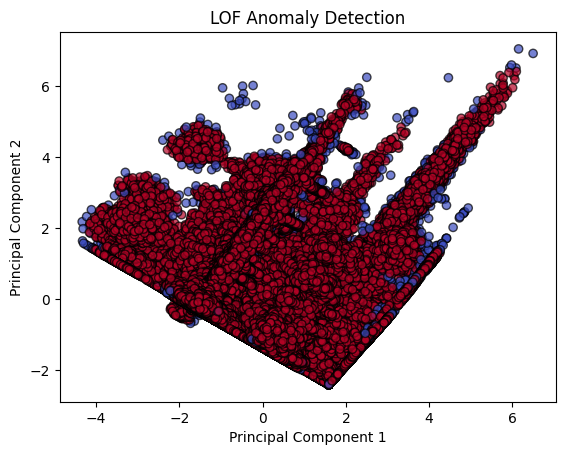

In [26]:
# LOF
from sklearn.neighbors import LocalOutlierFactor

# Configuración de LOF
lof = LocalOutlierFactor(n_neighbors=20)
lof_labels = lof.fit_predict(X_pca)

# Visualizar los resultados de LOF
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=lof_labels, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('LOF Anomaly Detection')
plt.show()


Con DBSCAN se presentan problemas de memoria, por tanto, se ajusta para Usar una Muestra de 50% y Aplicar PCA y DBSCAN

In [61]:
# # DBSCAN
# from sklearn.cluster import DBSCAN

# # Tomar una muestra del 50% de los datos
# sampled_df = X.sample(frac=0.5, random_state=42)  # Usar un random_state para reproducibilidad

# # Aplicar PCA sobre los datos muestreados
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(sampled_df)

# # Configurar y aplicar DBSCAN
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(X_pca)

# # Visualización de los resultados de DBSCAN
# plt.figure(figsize=(10, 8))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', alpha=0.7)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('DBSCAN on Sampled Data')
# plt.show()

DBSCAN se descarta por su costo computacional y se considera evaluar dos algoritmos más, Isolation Forest y One-Class SVM

#### Isolation Forest
Isolation Forest es un algoritmo eficiente para la detección de anomalías, especialmente en conjuntos de datos de alta dimensión. Funciona aislando observaciones al seleccionar aleatoriamente una característica y luego seleccionar aleatoriamente un valor de división entre los valores máximo y mínimo de la característica seleccionada.

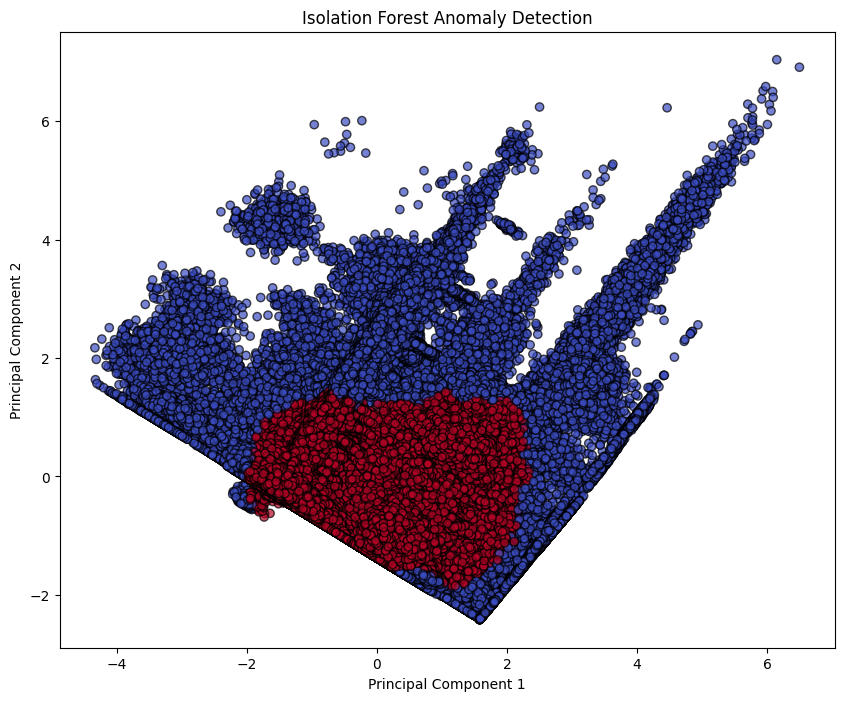

In [27]:
from sklearn.ensemble import IsolationForest

# Asumiendo que X_pca contiene tus datos transformados por PCA
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_labels = iso_forest.fit_predict(X_pca)

# Visualización
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iso_labels, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Isolation Forest Anomaly Detection')
plt.show()


#### One-Class SVM
El SVM de una clase es otro método efectivo para la detección de anomalías. Está diseñado para identificar outliers en un conjunto de datos al tratar de encontrar una frontera de decisión que separe las observaciones más "normales" de las menos frecuentes.

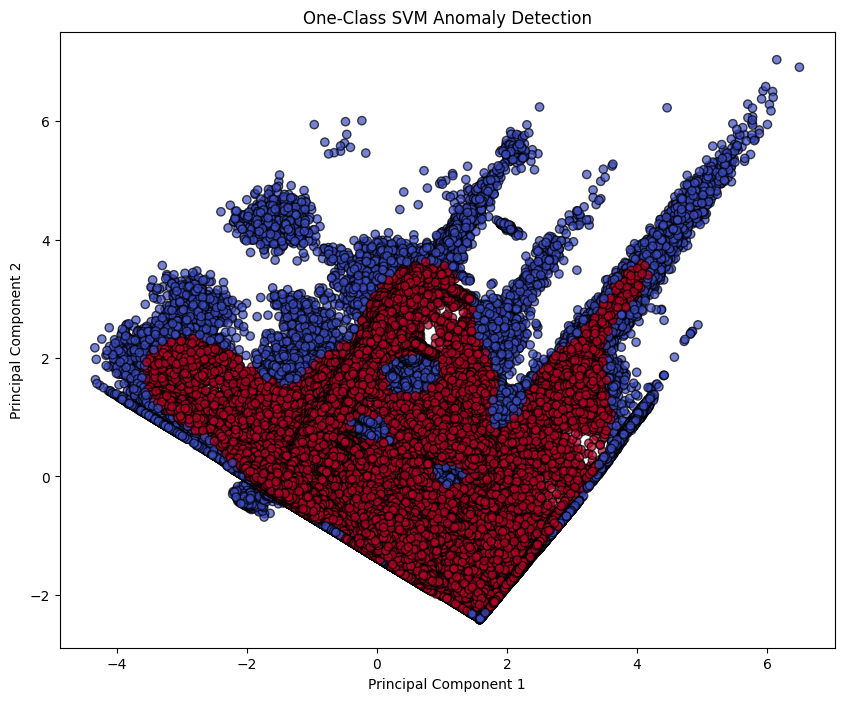

In [28]:
from sklearn.svm import OneClassSVM

# Asumiendo que X_pca contiene tus datos transformados por PCA
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
oc_svm_labels = oc_svm.fit_predict(X_pca)

# Visualización
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=oc_svm_labels, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('One-Class SVM Anomaly Detection')
plt.show()


#### 3. Evaluación con el Coeficiente de Silueta

In [29]:
from sklearn.metrics import silhouette_score

# Asumiendo que las etiquetas son -1 para anomalías y 1 para normales,
# y que necesitas convertirlas a 0 y 1 respectivamente para que silhouette_score funcione correctamente
lof_labels_adj = (lof_labels == 1).astype(int)
iso_labels_adj = (iso_labels == 1).astype(int)
oc_svm_labels_adj = (oc_svm_labels == 1).astype(int)

# Calcular el coeficiente de silueta
silhouette_lof = silhouette_score(X_pca, lof_labels_adj)
silhouette_iso = silhouette_score(X_pca, iso_labels_adj)
silhouette_svm = silhouette_score(X_pca, oc_svm_labels_adj)

print(f'Coeficiente de Silueta para LOF: {silhouette_lof}')
print(f'Coeficiente de Silueta para Isolation Forest: {silhouette_iso}')
print(f'Coeficiente de Silueta para One-Class SVM: {silhouette_svm}')


Coeficiente de Silueta para LOF: 0.13336181281437648
Coeficiente de Silueta para Isolation Forest: 0.3725675188185922
Coeficiente de Silueta para One-Class SVM: 0.3776893528648325


Los resultados del coeficiente de silueta obtenidos para cada uno de los métodos de detección de anomalías indican la calidad de las agrupaciones formadas, en el sentido de cuán bien están separados los grupos de datos normales y anómalos:

* LOF (Local Outlier Factor): Un coeficiente de silueta de 0.13336181281446494 sugiere una separación relativamente pobre entre las anomalías y los puntos normales. Esto puede deberse a la naturaleza del algoritmo, que se basa en la densidad local y puede no ser tan efectivo si los patrones de densidad no son uniformes o si el parámetro n_neighbors no está bien ajustado.
* Isolation Forest: Con un coeficiente de silueta de 0.37256751881882155, Isolation Forest muestra una mejor capacidad para distinguir entre datos normales y anómalos. Este método es eficaz para manejar grandes volúmenes de datos y tiende a funcionar bien con diversas distribuciones de datos.
* One-Class SVM: Tiene un coeficiente de silueta similar al de Isolation Forest, de 0.3777069241171725, lo que indica una buena separación de las anomalías respecto a los datos normales. El One-Class SVM es particularmente útil cuando los datos tienen una frontera de decisión clara, aunque la selección de parámetros como gamma y nu es crucial para su rendimiento.

#### Segunda métrica

Dado que se está trabajando con algoritmos de detección de anomalías en un entorno de aprendizaje no supervisado, una métrica interesante y relevante para complementar el coeficiente de silueta es el Índice Davies-Bouldin. Esta métrica es útil para evaluar la calidad de la separación entre los clusters formados por tu modelo. Un valor bajo del índice Davies-Bouldin sugiere que los clusters están bien separados y que los miembros de cada cluster están cerca uno del otro, lo cual es ideal en la detección de anomalías.

¿Por qué el Índice Davies-Bouldin?
El Índice Davies-Bouldin puede proporcionarte una visión de cómo los modelos están separando y agrupando los puntos de datos normales y anómalos sin necesidad de etiquetas previas. Además, dado que cada modelo puede tener una tendencia diferente a agrupar los datos, este índice te permitirá ver cuál modelo produce clusters más definidos y compactos.

In [30]:
from sklearn.metrics import davies_bouldin_score

db_index_lof = davies_bouldin_score(X_pca, lof_labels)
db_index_iso = davies_bouldin_score(X_pca, iso_labels)
db_index_oc_svm = davies_bouldin_score(X_pca, oc_svm_labels)

print(f'Índice Davies-Bouldin para LOF: {db_index_lof}')
print(f'Índice Davies-Bouldin para Isolation Forest: {db_index_iso}')
print(f'Índice Davies-Bouldin para One-Class SVM: {db_index_oc_svm}')

Índice Davies-Bouldin para LOF: 21.712807342162947
Índice Davies-Bouldin para Isolation Forest: 2.086616841552757
Índice Davies-Bouldin para One-Class SVM: 2.7994666350550763


#### Interpretación de los Resultados

#### LOF (Local Outlier Factor):

Índice Davies-Bouldin: 21.7128

Este valor es considerablemente más alto en comparación con los otros dos modelos. Un valor alto indica que los clusters formados por LOF no están bien definidos ni separados. Las anomalías no están claramente diferenciadas de los puntos normales, posiblemente debido a una densidad de puntos más uniforme o a la configuración del número de vecinos (n_neighbors). Esto podría sugerir que el ajuste de los parámetros, o la propia naturaleza de los datos, no es ideal para LOF en este caso.

#### Isolation Forest:

Índice Davies-Bouldin: 2.0866

Este resultado es mucho más bajo en comparación con LOF, lo que sugiere que Isolation Forest está haciendo un mejor trabajo al separar grupos de datos normales de las anomalías. Esto indica que los clusters son más compactos y están mejor separados, lo que es preferible en la detección de anomalías. Isolation Forest es conocido por su eficacia en conjuntos de datos de gran tamaño y diversas distribuciones, lo que podría estar contribuyendo a su buen desempeño aquí.

#### One-Class SVM:

Índice Davies-Bouldin: 2.7995

El valor para One-Class SVM también indica una buena separación y compactación de los clusters, aunque es ligeramente menos efectivo que Isolation Forest en este aspecto. Este modelo tiende a funcionar bien cuando los datos tienen una frontera de decisión clara.

Tomando en cuenta tanto el tiempo de ejecución como las métricas del coeficiente de silueta y el índice Davies-Bouldin, aquí está una conclusión integral sobre el rendimiento de los tres modelos de detección de anomalías que has evaluado: LOF (Local Outlier Factor), Isolation Forest y One-Class SVM.

#### Evaluación de Rendimiento

#### LOF (Local Outlier Factor):

Tiempo de Ejecución: Es rápido y eficiente.

Coeficiente de Silueta: 0.1334, significativamente más bajo que los otros dos modelos, indicando una pobre separación.

Índice Davies-Bouldin: 21.7128, muy alto, lo que sugiere una mala separación y compactación de los clusters.

Conclusión: LOF parece ser menos adecuado para este conjunto de datos en particular, dado su bajo rendimiento en las métricas de agrupación.

#### Isolation Forest:

Tiempo de Ejecución: Es rápido y eficiente, especialmente adecuado para grandes volúmenes de datos.

Coeficiente de Silueta: 0.3726, indicando una razonable separación entre grupos.

Índice Davies-Bouldin: 2.0866, sugiriendo una buena separación y compactación de los clusters.

Conclusión: Isolation Forest ofrece un excelente equilibrio entre eficiencia de tiempo y calidad de agrupación de los datos. Es robusto, escalable y proporciona un rendimiento consistente, lo que lo hace adecuado para aplicaciones prácticas donde el tiempo y la precisión son críticos.

#### One-Class SVM:

Tiempo de Ejecución: Significativamente más alto, lo que puede ser un problema.

Coeficiente de Silueta: 0.3777, ligeramente mejor que Isolation Forest, indicando una buena separación.

Índice Davies-Bouldin: 2.7995, bueno, pero no tan eficiente como Isolation Forest en términos de compactación y separación de clusters.

Conclusión: Aunque One-Class SVM muestra una buena capacidad para identificar y separar anomalías, su alto costo computacional y sensibilidad a la selección de parámetros pueden limitar su uso práctico en entornos como el caso de aplicación.

Basados en el análisis comprensivo de tiempo de ejecución y las métricas evaluadas, Isolation Forest emerge como el modelo más equilibrado y recomendado para la detección de anomalías en este escenario. Ofrece un buen rendimiento en cuanto a la identificación de grupos claramente definidos y separados de datos normales y anómalos, y lo hace de manera eficiente, lo que lo hace ideal para aplicaciones en tiempo real o en grandes conjuntos de datos.

#### 4. Análisis y Selección

Elección del Modelo: 

Dado que tanto Isolation Forest como One-Class SVM tienen coeficientes de silueta similares y significativamente más altos que LOF, uno de estos dos métodos sería una mejor elección para este conjunto de datos específico. La elección entre Isolation Forest y One-Class SVM dependerá de otros factores, como la velocidad de ejecución, ya que según la corridas Isolation Forest es mucho más eficiente que One-Class SVM.

##### Implementación Isolation Forest

Paso 1: Entrenar Isolation Forest

In [7]:
from sklearn.ensemble import IsolationForest
# Seleccionamos solo las columnas numéricas
features = ['Active_energy_N', 'Reactive_energy_N', 'Voltaje_FA_N', 'Voltaje_FC_N']
X = df[features]

# Ajustar contamination según sea necesario
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)  
iso_labels = iso_forest.fit_predict(X)

# Añadir las etiquetas de anomalías al DataFrame original
df['Anomaly'] = iso_labels


Conteo total de anomalias

In [8]:
num_anomalies = (df['Anomaly'] == -1).sum()
num_normal = (df['Anomaly'] == 1).sum()

print("Número total de anomalías detectadas:", num_anomalies)
print("Número total de normales:", num_normal)

Número total de anomalías detectadas: 4635
Número total de normales: 458790


Paso 2: Visualizar las Anomalías en una Serie de Tiempo

In [9]:
# Agrupar por 'NumeroCliente' y contar total de registros y anomalías
cliente_summary = df.groupby('NumeroCliente').agg(
    total_registros=('Anomaly', 'size'),  # Cuenta el total de registros por cliente
    total_anomalias=('Anomaly', lambda x: (x == -1).sum())  # Cuenta cuántos se clasificaron como anomalías
)

print("Resumen de registros y anomalías por cliente:")
print(cliente_summary)

Resumen de registros y anomalías por cliente:
               total_registros  total_anomalias
NumeroCliente                                  
Cliente 1                19681                0
Cliente 10               19681             1341
Cliente 11               14000                0
Cliente 12               11415                0
Cliente 13               14000                0
Cliente 14               14000                0
Cliente 15               14000                0
Cliente 16               19500                0
Cliente 17               19500                0
Cliente 18               19500              106
Cliente 19               19500                1
Cliente 2                19681                0
Cliente 20               19500                1
Cliente 21                8925                0
Cliente 22                8925                0
Cliente 23                8925                0
Cliente 24                8925                0
Cliente 25                8925            

#### Ajuste de parámetros

1. Ajustar el Parámetro contamination
El parámetro contamination es una estimación de la proporción de outliers (anomalías) en tu conjunto de datos. Incrementar este valor hará que el modelo sea más inclinado a considerar observaciones como anomalías.

In [32]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Aumenta a 0.05
iso_labels = iso_forest.fit_predict(X)

# Añadir o actualizar la columna de anomalías en el DataFrame original
df['Anomaly'] = iso_labels

In [33]:
num_anomalies = (df['Anomaly'] == -1).sum()
num_normal = (df['Anomaly'] == 1).sum()

print("Número total de anomalías detectadas:", num_anomalies)
print("Número total de normales:", num_normal)

Número total de anomalías detectadas: 23171
Número total de normales: 440254


In [34]:
# Agrupar por 'NumeroCliente' y contar total de registros y anomalías
cliente_summary = df.groupby('NumeroCliente').agg(
    total_registros=('Anomaly', 'size'),  # Cuenta el total de registros por cliente
    total_anomalias=('Anomaly', lambda x: (x == -1).sum())  # Cuenta cuántos se clasificaron como anomalías
)

print("Resumen de registros y anomalías por cliente:")
print(cliente_summary)

Resumen de registros y anomalías por cliente:
               total_registros  total_anomalias
NumeroCliente                                  
Cliente 1                19681                0
Cliente 10               19681             5259
Cliente 11               14000                0
Cliente 12               11415                0
Cliente 13               14000                0
Cliente 14               14000                0
Cliente 15               14000                0
Cliente 16               19500                0
Cliente 17               19500                0
Cliente 18               19500              175
Cliente 19               19500              116
Cliente 2                19681              384
Cliente 20               19500              922
Cliente 21                8925                0
Cliente 22                8925                0
Cliente 23                8925                0
Cliente 24                8925                0
Cliente 25                8925            

2. Modificar el Número de Árboles (n_estimators)
Aumentar el número de árboles puede mejorar la estabilidad de las predicciones de anomalías, aunque esto también aumentará el tiempo de cómputo. Más árboles pueden capturar mejor las variaciones en los datos que podrían ser indicativas de comportamientos anómalos.

In [36]:
iso_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)
iso_labels = iso_forest.fit_predict(X)

# Añadir o actualizar la columna de anomalías en el DataFrame original
df['Anomaly'] = iso_labels

In [37]:
num_anomalies = (df['Anomaly'] == -1).sum()
num_normal = (df['Anomaly'] == 1).sum()

print("Número total de anomalías detectadas:", num_anomalies)
print("Número total de normales:", num_normal)

Número total de anomalías detectadas: 23172
Número total de normales: 440253


In [38]:
# Agrupar por 'NumeroCliente' y contar total de registros y anomalías
cliente_summary = df.groupby('NumeroCliente').agg(
    total_registros=('Anomaly', 'size'),  # Cuenta el total de registros por cliente
    total_anomalias=('Anomaly', lambda x: (x == -1).sum())  # Cuenta cuántos se clasificaron como anomalías
)

print("Resumen de registros y anomalías por cliente:")
print(cliente_summary)

Resumen de registros y anomalías por cliente:
               total_registros  total_anomalias
NumeroCliente                                  
Cliente 1                19681                0
Cliente 10               19681             5139
Cliente 11               14000                0
Cliente 12               11415                0
Cliente 13               14000                0
Cliente 14               14000                0
Cliente 15               14000                0
Cliente 16               19500                0
Cliente 17               19500               47
Cliente 18               19500              296
Cliente 19               19500              121
Cliente 2                19681              370
Cliente 20               19500             1202
Cliente 21                8925                0
Cliente 22                8925                0
Cliente 23                8925                0
Cliente 24                8925                0
Cliente 25                8925            

3. Cambiar el Parámetro max_samples
max_samples define el número de muestras que se usan para entrenar cada árbol de base. Si se establece un número más bajo, cada árbol se construirá con una porción más pequeña del conjunto de datos, lo que podría hacer que el modelo sea más sensible a las anomalías.

In [40]:
iso_forest = IsolationForest(n_estimators=200, contamination=0.05, max_samples=256, random_state=42)
iso_labels = iso_forest.fit_predict(X)

# Añadir o actualizar la columna de anomalías en el DataFrame original
df['Anomaly'] = iso_labels

In [41]:
num_anomalies = (df['Anomaly'] == -1).sum()
num_normal = (df['Anomaly'] == 1).sum()

print("Número total de anomalías detectadas:", num_anomalies)
print("Número total de normales:", num_normal)

Número total de anomalías detectadas: 23172
Número total de normales: 440253


In [42]:
# Agrupar por 'NumeroCliente' y contar total de registros y anomalías
cliente_summary = df.groupby('NumeroCliente').agg(
    total_registros=('Anomaly', 'size'),  # Cuenta el total de registros por cliente
    total_anomalias=('Anomaly', lambda x: (x == -1).sum())  # Cuenta cuántos se clasificaron como anomalías
)

print("Resumen de registros y anomalías por cliente:")
print(cliente_summary)

Resumen de registros y anomalías por cliente:
               total_registros  total_anomalias
NumeroCliente                                  
Cliente 1                19681                0
Cliente 10               19681             5139
Cliente 11               14000                0
Cliente 12               11415                0
Cliente 13               14000                0
Cliente 14               14000                0
Cliente 15               14000                0
Cliente 16               19500                0
Cliente 17               19500               47
Cliente 18               19500              296
Cliente 19               19500              121
Cliente 2                19681              370
Cliente 20               19500             1202
Cliente 21                8925                0
Cliente 22                8925                0
Cliente 23                8925                0
Cliente 24                8925                0
Cliente 25                8925            

Tras la exploración del impacto de los distintos parámetros de Isolation Forest en la detección de anomalías se ha identificado cómo cada uno influye en los resultados. 

1. Parámetro contamination
El parámetro contamination es el que más influye en el número de anomalías detectadas. Este parámetro define la proporción esperada de outliers en los datos.

2. Parámetro n_estimators
Se onserva que ajustar n_estimators, que define el número de árboles en el bosque, mejora la distribución de las anomalías entre los clientes, probablemente haciendo que el modelo sea más estable y menos susceptible a variaciones en datos específicos.

3. Parámetro max_samples
Se evidencia que ajustar max_samples, que controla el número de muestras para entrenar cada árbol base, no tiene un efecto notable. Esto puede deberse a que el tamaño de la muestra por defecto es suficientemente representativo.

In [49]:
iso_forest = IsolationForest(n_estimators=300, contamination=0.08, random_state=42)
iso_labels = iso_forest.fit_predict(X)

# Añadir o actualizar la columna de anomalías en el DataFrame original
df['Anomaly'] = iso_labels

In [50]:
num_anomalies = (df['Anomaly'] == -1).sum()
num_normal = (df['Anomaly'] == 1).sum()

print("Número total de anomalías detectadas:", num_anomalies)
print("Número total de normales:", num_normal)

Número total de anomalías detectadas: 37074
Número total de normales: 426351


In [51]:
# Agrupar por 'NumeroCliente' y contar total de registros y anomalías
cliente_summary = df.groupby('NumeroCliente').agg(
    total_registros=('Anomaly', 'size'),  # Cuenta el total de registros por cliente
    total_anomalias=('Anomaly', lambda x: (x == -1).sum())  # Cuenta cuántos se clasificaron como anomalías
)

print("Resumen de registros y anomalías por cliente:")
print(cliente_summary)

Resumen de registros y anomalías por cliente:
               total_registros  total_anomalias
NumeroCliente                                  
Cliente 1                19681               10
Cliente 10               19681             6917
Cliente 11               14000                0
Cliente 12               11415                0
Cliente 13               14000                0
Cliente 14               14000                0
Cliente 15               14000                0
Cliente 16               19500              435
Cliente 17               19500              599
Cliente 18               19500              503
Cliente 19               19500              498
Cliente 2                19681              565
Cliente 20               19500             2458
Cliente 21                8925                0
Cliente 22                8925                0
Cliente 23                8925                0
Cliente 24                8925                0
Cliente 25                8925            

Después de los resultados obtenidos se determina Aplicar el modelo Isolation Forest de manera individual a cada cliente como estrategia, se sospecha que diferentes clientes pueden tener patrones de comportamiento muy distintos que podrían no ser capturados adecuadamente por un modelo global. Esta aproximación permite adaptar el modelo de manera más precisa a las particularidades de cada cliente, posiblemente mejorando la detección de anomalías. 

In [8]:
from sklearn.ensemble import IsolationForest

def apply_isolation_forest_per_client(df, features, contamination, n_estimators):
    for cliente in df['NumeroCliente'].unique():
        # Filtrar datos por cliente
        client_data = df[df['NumeroCliente'] == cliente]
        
        # Preparar datos del cliente
        X_client = client_data[features]
        
        # Chequear si hay datos suficientes para aplicar el modelo
        if len(X_client) > 10:  # Asegúrate de que haya suficientes puntos para formar un bosque
            # Aplicar Isolation Forest
            iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)
            client_data['Anomaly'] = iso_forest.fit_predict(X_client)
            
            # Actualizar las etiquetas de anomalías en el DataFrame original
            df.loc[df['NumeroCliente'] == cliente, 'Anomaly'] = client_data['Anomaly']
        else:
            # Si no hay suficientes datos, marcar como normal (-1 para anomalía, 1 para normal)
            df.loc[df['NumeroCliente'] == cliente, 'Anomaly'] = 1

# Lista de características para usar en el modelo
features = ['Active_energy_N', 'Reactive_energy_N', 'Voltaje_FA_N', 'Voltaje_FC_N']

In [9]:
apply_isolation_forest_per_client(df, features, 0.05, 200)

In [10]:
num_anomalies = (df['Anomaly'] == -1).sum()
num_normal = (df['Anomaly'] == 1).sum()

print("Número total de anomalías detectadas:", num_anomalies)
print("Número total de normales:", num_normal)

Número total de anomalías detectadas: 23176
Número total de normales: 440249


In [11]:
# Agrupar por 'NumeroCliente' y contar total de registros y anomalías
cliente_summary = df.groupby('NumeroCliente').agg(
    total_registros=('Anomaly', 'size'),  # Cuenta el total de registros por cliente
    total_anomalias=('Anomaly', lambda x: (x == -1).sum())  # Cuenta cuántos se clasificaron como anomalías
)

print("Resumen de registros y anomalías por cliente:")
print(cliente_summary)

Resumen de registros y anomalías por cliente:
               total_registros  total_anomalias
NumeroCliente                                  
Cliente 1                19681              984
Cliente 10               19681              984
Cliente 11               14000              700
Cliente 12               11415              571
Cliente 13               14000              700
Cliente 14               14000              700
Cliente 15               14000              700
Cliente 16               19500              975
Cliente 17               19500              975
Cliente 18               19500              975
Cliente 19               19500              975
Cliente 2                19681              984
Cliente 20               19500              975
Cliente 21                8925              447
Cliente 22                8925              447
Cliente 23                8925              447
Cliente 24                8925              447
Cliente 25                8925            

Este resumen muestra una distribución consistente de anomalías detectadas a través de varios clientes, donde la proporción de anomalías parece ser bastante uniforme en relación con el total de registros para cada cliente. Esto indica que el ajuste del parámetro contamination ha sido efectivo para aplicar de manera uniforme el criterio de detección de anomalías a través de los diferentes conjuntos de datos de cada cliente.La proporción de anomalías es bastante consistente, lo que puede indicar que el modelo está funcionando de manera uniforme. 

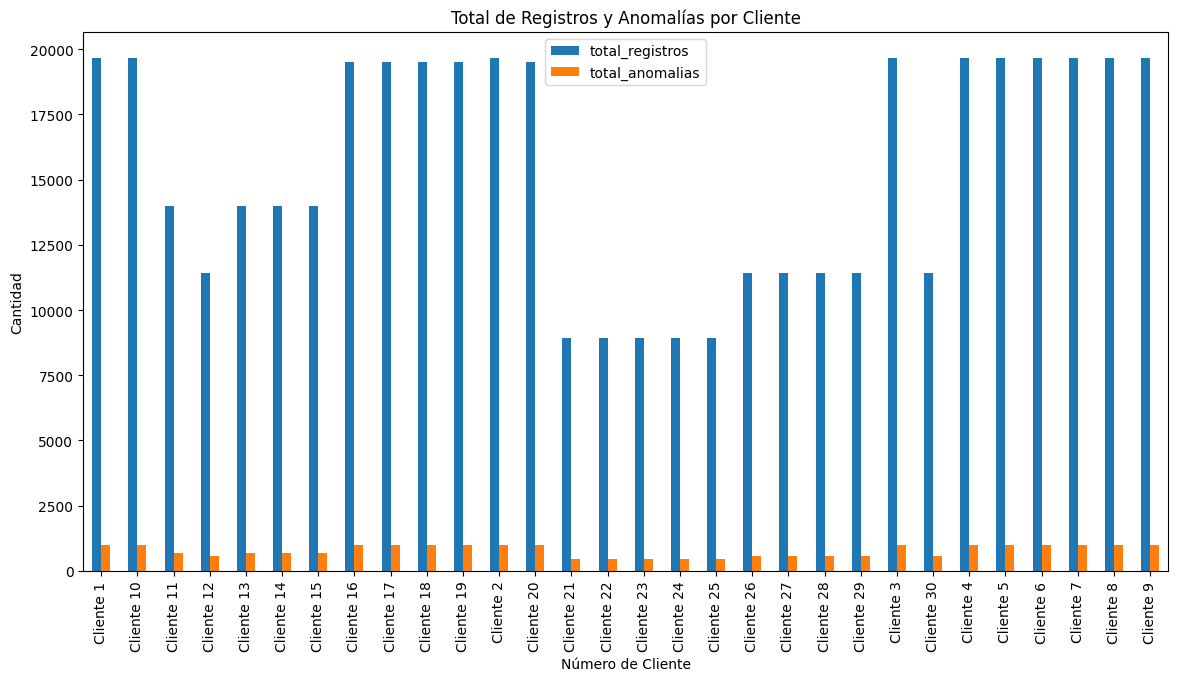

In [12]:
import matplotlib.pyplot as plt

# Dibujar un gráfico de barras con el total de registros y anomalías por cliente
cliente_summary.plot(kind='bar', figsize=(14, 7))
plt.title('Total de Registros y Anomalías por Cliente')
plt.xlabel('Número de Cliente')
plt.ylabel('Cantidad')
plt.show()

#### 5. Visualización interactiva 
Que  permita filtrar por cliente, año, mes, semana y día de la semana, y visualizar las cuatro variables de consumo (Active_energy, Reactive_energy, Voltaje_FA, Voltaje_FC), podemos utilizar ipywidgets junto con matplotlib para trazar las gráficas.

Paso 1: Crear Widgets para la Selección de Filtros
Primero, definiremos los widgets que permitirán seleccionar los diferentes filtros (cliente, año, mes, semana del mes, día de la semana).

In [13]:
df.sample(5)

,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,NumeroCliente,Sector Económico:,Active_energy_N,Reactive_energy_N,Voltaje_FA_N,Voltaje_FC_N,Año,Mes,Día,Hora,Día_semana,Semana_del_mes,Anomaly
Fecha,,,,,,,,,,,,,,,,,
2021-11-28 11:00:00,3.864124,2.848815,1903.208328,1808.889904,Cliente 19,"Captación, tratamiento y distribución de agua",1.391730,1.704913,0.630329,0.496183,2021,11,28,11,6,4,1.0
2021-09-20 18:00:00,0.701103,0.208440,2230.062094,2206.935073,Cliente 13,"Cultivo de hortalizas y melones, raíces y tubé...",-0.448543,-0.573542,1.056865,1.029436,2021,9,20,18,0,3,1.0
2022-03-09 19:00:00,0.014095,0.254324,2132.082761,1879.154136,Cliente 17,"Captación, tratamiento y distribución de agua",-0.848251,-0.533947,0.929004,0.590315,2022,3,9,19,2,2,1.0
2022-05-17 07:00:00,0.700819,0.578660,1905.047424,1894.329965,Cliente 16,"Captación, tratamiento y distribución de agua",-0.448709,-0.254069,0.632729,0.610645,2022,5,17,7,1,3,1.0
2022-05-08 19:00:00,0.839207,0.010000,2118.459464,2090.226074,Cliente 15,Cultivo de otros frutos y nueces de árboles y ...,-0.368193,-0.744782,0.911226,0.873083,2022,5,8,19,6,2,1.0


In [25]:
import ipywidgets as widgets
from IPython.display import display

# Crear un dropdown para el sector económico con la opción "Todos"
sector_selector = widgets.Dropdown(
    options=['Todos'] + sorted(df['Sector Económico:'].unique().tolist()),
    description='Sector Económico:',
    disabled=False,
)

# Crear un dropdown para los clientes, inicialmente vacío
cliente_selector = widgets.Dropdown(
    options=[],
    description='Cliente:',
    disabled=False,
)

# Función para actualizar la lista de clientes en función del sector seleccionado
def update_cliente_options(*args):
    if sector_selector.value == 'Todos':
        # Mostrar todos los clientes
        cliente_selector.options = ['Todos'] + sorted(df['NumeroCliente'].unique().tolist())
    else:
        # Filtrar los clientes por sector
        filtered_clients = df[df['Sector Económico:'] == sector_selector.value]['NumeroCliente'].unique()
        cliente_selector.options = ['Todos'] + sorted(filtered_clients.tolist())

# Observar cambios en el sector para actualizar los clientes
sector_selector.observe(update_cliente_options, 'value')

# Llamar a la función inicialmente para cargar los datos
update_cliente_options()

year_selector = widgets.Dropdown(
    options=sorted(df['Año'].unique()),
    description='Año:',
    disabled=False,
)

month_selector = widgets.Dropdown(
    options=['Todos'] + sorted(df['Mes'].unique().tolist()),
    description='Mes:',
    disabled=False,
)

week_selector = widgets.Dropdown(
    options=['Todas'] + sorted(df['Semana_del_mes'].unique().tolist()),
    description='Semana del Mes:',
    disabled=False,
)

day_selector = widgets.Dropdown(
    options=['Todos'] + sorted(df['Día_semana'].unique().tolist()),
    description='Día Semana:',
    disabled=False,
)

# Crear un widget para seleccionar las variables de energía y voltaje
variable_selector = widgets.SelectMultiple(
    options=['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC'],
    value=['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC'],
    description='Variables:',
    disabled=False
)

# Crear un widget para seleccionar franjas horarias
time_frame_selector = widgets.Dropdown(
    options=['Todas', '00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59'],
    description='Franja Horaria:',
    disabled=False,
)

# Función para filtrar por franja horaria
def filter_time_frame(data, time_frame):
    if time_frame == 'Todas':
        return data
    else:
        ranges = {
            '00:00-05:59': (0, 5),
            '06:00-11:59': (6, 11),
            '12:00-17:59': (12, 17),
            '18:00-23:59': (18, 23)
        }
        start, end = ranges[time_frame]
        return data[(data['Hora'] >= start) & (data['Hora'] <= end)]



In [26]:
# Datos Reales
# Función para Dibujar la Gráfica Basada en los Filtros

# Crear el botón para trazar los datos
plot_button = widgets.Button(description="Plot Data")

# Importar el módulo clear_output
from IPython.display import clear_output

# Crear un contenedor de salida
output = widgets.Output()


# Crear un widget para seleccionar las variables de energía y voltaje
variable_selector = widgets.SelectMultiple(
    options=['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC'],
    value=['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC'],
    description='Variables:',
    disabled=False
)

def plot_data(b=None):
    with output:
        clear_output(wait=True)
        mask = (df['NumeroCliente'] == cliente_selector.value) & (df['Año'] == year_selector.value)
        if month_selector.value != 'Todos':
            mask &= (df['Mes'] == month_selector.value)
        if week_selector.value != 'Todas':
            mask &= (df['Semana_del_mes'] == week_selector.value)
        if day_selector.value != 'Todos':
            mask &= (df['Día_semana'] == day_selector.value)
        if sector_selector.value != 'Todos':
            mask &= (df['Sector Económico:'] == sector_selector.value)
        
        data = df[mask]
        data = filter_time_frame(data, time_frame_selector.value)

        plt.figure(figsize=(15, 8))
        for variable in variable_selector.value:
            plt.plot(data.index, data[variable], label=variable)
        
        # Asegurarte de que hay anomalías y trazarlas
        anomalies = data[data['Anomaly'] == -1]
        if not anomalies.empty:
            plt.scatter(anomalies.index, anomalies['Active_energy'], color='red', s=100, marker='*', label='Anomaly in Active Energy')

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.title(f'Energy Consumption for {cliente_selector.value} for Selected Period')
        plt.xlabel('Time')
        plt.ylabel('Consumption')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Asociar la función de trazado al botón
plot_button.on_click(plot_data)

# Mostrar los widgets y el botón
widget_box = widgets.VBox([sector_selector, cliente_selector, year_selector, month_selector, week_selector, day_selector, variable_selector, time_frame_selector, plot_button, output])
display(widget_box)

#### 6. Preparación de los datos para exportarlos a PBI


In [14]:
db = df[['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC',
       'NumeroCliente', 'Sector Económico:', 'Año', 'Mes',
       'Día', 'Hora', 'Día_semana', 'Semana_del_mes', 'Anomaly']]

In [15]:
db.head()

,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,NumeroCliente,Sector Económico:,Año,Mes,Día,Hora,Día_semana,Semana_del_mes,Anomaly
Fecha,,,,,,,,,,,,,
2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1,Elaboración de cacao y chocolate y de producto...,2021,1,1,0,4,1,1.0
2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1,Elaboración de cacao y chocolate y de producto...,2021,1,1,1,4,1,1.0
2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1,Elaboración de cacao y chocolate y de producto...,2021,1,1,2,4,1,1.0
2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1,Elaboración de cacao y chocolate y de producto...,2021,1,1,3,4,1,1.0
2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1,Elaboración de cacao y chocolate y de producto...,2021,1,1,4,4,1,1.0


In [16]:
# Archivo con la información de los clusters identificados en el primer Dashboard.
clusters = pd.read_csv('clusters.csv')

In [17]:
clusters.head()

,Active_energy,Cluster
0,0.357841,1
1,0.372264,1
2,1.044687,1
3,0.566425,1
4,1.080556,1


In [18]:
# Paso 1: Resetear el índice para alinear los DataFrames por posición
db.reset_index(inplace=True, drop=False)  # Drop=False para no perder la columna de fecha

# Paso 2: Añadir la columna 'Cluster'
db['Cluster'] = clusters['Cluster'].values  # Aseguramos que se tomen solo los valores

In [19]:
# Redondeando columnas específicas
db[['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']] = db[['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']].round(2)

In [20]:
db.head()

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,NumeroCliente,Sector Económico:,Año,Mes,Día,Hora,Día_semana,Semana_del_mes,Anomaly,Cluster
0,2021-01-01 00:00:00,0.36,0.28,455.14,510.56,Cliente 1,Elaboración de cacao y chocolate y de producto...,2021,1,1,0,4,1,1.0,1
1,2021-01-01 01:00:00,0.37,0.43,469.98,469.92,Cliente 1,Elaboración de cacao y chocolate y de producto...,2021,1,1,1,4,1,1.0,1
2,2021-01-01 02:00:00,1.04,0.34,468.72,546.95,Cliente 1,Elaboración de cacao y chocolate y de producto...,2021,1,1,2,4,1,1.0,1
3,2021-01-01 03:00:00,0.57,0.50,452.33,444.12,Cliente 1,Elaboración de cacao y chocolate y de producto...,2021,1,1,3,4,1,1.0,1
4,2021-01-01 04:00:00,1.08,0.47,513.48,535.46,Cliente 1,Elaboración de cacao y chocolate y de producto...,2021,1,1,4,4,1,1.0,1


In [21]:
db.dtypes

Fecha                datetime64[ns]
Active_energy               float64
Reactive_energy             float64
Voltaje_FA                  float64
Voltaje_FC                  float64
NumeroCliente                object
Sector Económico:            object
Año                           int32
Mes                           int32
Día                           int32
Hora                          int32
Día_semana                    int32
Semana_del_mes                int32
Anomaly                     float64
Cluster                       int64
dtype: object

In [22]:
db['Cluster'] = db['Cluster'].astype('int32')

# Verifica los tipos de datos para asegurarte de que el cambio fue efectuado
print(db.dtypes)


Fecha                datetime64[ns]
Active_energy               float64
Reactive_energy             float64
Voltaje_FA                  float64
Voltaje_FC                  float64
NumeroCliente                object
Sector Económico:            object
Año                           int32
Mes                           int32
Día                           int32
Hora                          int32
Día_semana                    int32
Semana_del_mes                int32
Anomaly                     float64
Cluster                       int32
dtype: object


Se mapea la variable anomalía para los valores Normal:0 Anomalía:1

In [23]:
db['Anomaly'] = db['Anomaly'].map({-1: 1, 1: 0})
db['Anomaly'] = db['Anomaly'].astype('int32')
# Verifica los tipos de datos para asegurarte de que el cambio fue efectuado
print(db.dtypes)

Fecha                datetime64[ns]
Active_energy               float64
Reactive_energy             float64
Voltaje_FA                  float64
Voltaje_FC                  float64
NumeroCliente                object
Sector Económico:            object
Año                           int32
Mes                           int32
Día                           int32
Hora                          int32
Día_semana                    int32
Semana_del_mes                int32
Anomaly                       int32
Cluster                       int32
dtype: object


In [24]:
db.sample(5)

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,NumeroCliente,Sector Económico:,Año,Mes,Día,Hora,Día_semana,Semana_del_mes,Anomaly,Cluster
333875,2022-04-10 14:00:00,0.44,0.46,1826.35,1809.74,Cliente 19,"Captación, tratamiento y distribución de agua",2022,4,10,14,6,2,0,0
422174,2021-07-03 17:00:00,1.78,0.11,993.94,1091.48,Cliente 27,Venta al por mayor de metales y minerales meta...,2021,7,3,17,5,1,0,3
113126,2022-09-06 09:00:00,0.52,0.41,2292.15,2145.83,Cliente 6,Cultivo de Árboles Frutales y Nueces,2022,9,6,9,1,1,0,0
41857,2021-04-14 23:00:00,1.38,0.90,794.76,923.07,Cliente 3,Elaboración de cacao y chocolate y de producto...,2021,4,14,23,2,2,0,3
433260,2021-06-20 00:00:00,3.65,3.01,1193.37,1105.35,Cliente 28,Venta al por mayor de metales y minerales meta...,2021,6,20,0,6,3,1,3


In [89]:
db.to_csv('db.csv')